In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

In [3]:
# import packages
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from pysal.esda.mapclassify import Natural_Breaks as nb
import matplotlib.cm as cm

# map data 

In [4]:
china_map = gpd.read_file('../data/China_city.json')
len(china_map)

344

## Henan

In [5]:
he_nan = china_map['NAME_1'] == '河南'
he_nan_map = china_map[he_nan]
len(he_nan_map)

18

## Shan xi

In [6]:
shan_xi = china_map['NAME_1'] == '山西'
shan_xi = china_map[shan_xi]
shan_xi

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
261,None,49,CHN,China,25,山西,262,Changzhi,,0,,Dìjíshì,Prefecture City,长治市,Chángzhì,"POLYGON ((113.5371984459791 36.74412888223507,..."
262,None,49,CHN,China,25,山西,263,Datong,,0,,Dìjíshì,Prefecture City,大同市,Dàtóng,"POLYGON ((114.1279054162574 40.73565776507434,..."
263,None,49,CHN,China,25,山西,264,Jincheng,,0,,Dìjíshì,Prefecture City,晋城市,Jìnchéng,"POLYGON ((113.5717500164746 35.82184760500213,..."
264,None,49,CHN,China,25,山西,265,Jinzhong,,0,,Dìjíshì,Prefecture City,晋中市,Jìnzhōng,"POLYGON ((113.9905317022392 37.70391760429375,..."
265,None,49,CHN,China,25,山西,266,Linfen,,0,,Dìjíshì,Prefecture City,临汾市,Línfén,"POLYGON ((111.4083221626786 36.80373892847598,..."
266,None,49,CHN,China,25,山西,267,Luliang,,0,,Dìjíshì,Prefecture City,吕梁市,Lǚlíang,"POLYGON ((111.7962988337846 38.22835205605365,..."
267,None,49,CHN,China,25,山西,268,Shuozhou,,0,,Dìjíshì,Prefecture City,朔州市,Shuòzhōu,"POLYGON ((112.6296993654951 40.22930725992684,..."
268,None,49,CHN,China,25,山西,269,Taiyuan,,0,,Dìjíshì,Prefecture City,太原市,Tàiyuán,"POLYGON ((113.0626347066434 38.05554989953507,..."
269,None,49,CHN,China,25,山西,270,Xinzhou,,0,,Dìjíshì,Prefecture City,忻州市,Xīnzhōu,"POLYGON ((111.929509707984 39.61445307510489, ..."
270,None,49,CHN,China,25,山西,271,Yangquan,,0,,Dìjíshì,Prefecture City,阳泉市,Yángquán,"POLYGON ((113.5488543974716 38.52070919295429,..."


In [7]:
shan_xi_city_name = ['长治市', '晋城市', '运城县']
shan_xi_city = shan_xi.loc[shan_xi['NL_NAME_2'].isin(shan_xi_city_name)]
shan_xi_city

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
261,None,49,CHN,China,25,山西,262,Changzhi,,0,,Dìjíshì,Prefecture City,长治市,Chángzhì,"POLYGON ((113.5371984459791 36.74412888223507,..."
263,None,49,CHN,China,25,山西,264,Jincheng,,0,,Dìjíshì,Prefecture City,晋城市,Jìnchéng,"POLYGON ((113.5717500164746 35.82184760500213,..."
271,None,49,CHN,China,25,山西,272,Yuncheng,,0,,Dìjíshì,Prefecture City,运城县,Yùnchéng,"POLYGON ((111.936170251694 35.62057997696401, ..."


## Shan dong

In [8]:
shandong = china_map['NAME_1'] == '山东'
shandong = china_map[shandong]
shandong

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
243,None,49,CHN,China,23,山东,244,Binzhou,,0,,Dìqu,Prefecture,滨州,Bīnzhōu,"POLYGON ((118.2699310358977 38.13056478918654,..."
244,None,49,CHN,China,23,山东,245,Dezhou,,0,,Dìjíshì,Prefecture City,德州市,Dézhōu,"POLYGON ((117.2671029235647 37.53178522357562,..."
245,None,49,CHN,China,23,山东,246,Dongying,,0,,Dìjíshì,Prefecture City,东营市,Dōngyíng,"POLYGON ((118.9418133826414 37.31511275212692,..."
246,None,49,CHN,China,23,山东,247,Heze,,0,,Dìjíshì,Prefecture City,菏泽市,Hézé,"POLYGON ((115.8667236085426 35.86169926512949,..."
247,None,49,CHN,China,23,山东,248,Jinan,,0,,Dìjíshì,Prefecture City,济南市,Jǐnán,"POLYGON ((117.2671029235647 37.53178522357562,..."
248,None,49,CHN,China,23,山东,249,Jining,,0,,Dìjíshì,Prefecture City,济宁市,Jǐníng,"POLYGON ((116.0374000411107 35.96886339320303,..."
249,None,49,CHN,China,23,山东,250,Laiwu,,0,,Dìjíshì,Prefecture City,莱芜市,Láiwú,"POLYGON ((117.9727042728401 36.26222519380435,..."
250,None,49,CHN,China,23,山东,251,Liaocheng,,0,,Dìjíshì,Prefecture City,聊城市,Liáochéng,"POLYGON ((116.5448502150144 36.40086878449951,..."
251,None,49,CHN,China,23,山东,252,Linyi,,0,,Dìjíshì,Prefecture City,临沂市,Línyí,"POLYGON ((119.0109165236324 36.02612922414233,..."
252,None,49,CHN,China,23,山东,253,Qingdao,,0,,Dìjíshì,Prefecture City,青岛市,Qīngdǎo,(POLYGON ((120.1765116728779 35.78735415127846...


In [9]:
shandong_city_name = ['聊城市', '菏泽市']
shandong_city = shandong.loc[shandong['NL_NAME_2'].isin(shandong_city_name)]
shandong_city

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
246,None,49,CHN,China,23,山东,247,Heze,,0,,Dìjíshì,Prefecture City,菏泽市,Hézé,"POLYGON ((115.8667236085426 35.86169926512949,..."
250,None,49,CHN,China,23,山东,251,Liaocheng,,0,,Dìjíshì,Prefecture City,聊城市,Liáochéng,"POLYGON ((116.5448502150144 36.40086878449951,..."


## Anhui

In [10]:
anhui = china_map['NAME_1'] == '安徽'
anhui = china_map[anhui]
anhui

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,None,49,CHN,China,1,安徽,1,Anqing,,0,,Dìjíshì,Prefecture City,安庆市,Ānqìng,"POLYGON ((117.7312595633535 30.97468013707567,..."
1,None,49,CHN,China,1,安徽,2,Bengbu,,0,,Dìjíshì,Prefecture City,蚌埠市,Bèngbù,"POLYGON ((117.9756182607132 33.33229095469363,..."
2,None,49,CHN,China,1,安徽,3,Bozhou,,0,,Dìjíshì,Prefecture City,亳州市,Bózhōu,"POLYGON ((116.4095579209055 33.80481778191791,..."
3,None,49,CHN,China,1,安徽,4,Chaohu,,0,,Dìjíshì,Prefecture City,巢湖市,Cháohú,"POLYGON ((118.4847335705444 31.79080194993575,..."
4,None,49,CHN,China,1,安徽,5,Chizhou,,0,,Dìjíshì,Prefecture City,池州市,Chízhōu,"POLYGON ((118.0955080474928 30.64347600374838,..."
5,None,49,CHN,China,1,安徽,6,Chuzhou,,0,,Dìjíshì,Prefecture City,滁州市,Chúzhōu,"POLYGON ((119.1790952523092 32.83129865594982,..."
6,None,49,CHN,China,1,安徽,7,Fuyang,,0,,Dìjíshì,Prefecture City,阜阳市,Fùyáng,"POLYGON ((116.3829157460656 32.89526224489371,..."
7,None,49,CHN,China,1,安徽,8,Hefei,,0,,Dìjíshì,Prefecture City,合肥市,Héféi,"POLYGON ((117.8136837917645 32.01015352458629,..."
8,None,49,CHN,China,1,安徽,9,Huaibei,,0,,Dìjíshì,Prefecture City,淮北市,Huáiběi,"POLYGON ((116.9182569467548 33.30884880167754,..."
9,None,49,CHN,China,1,安徽,10,Huainan,,0,,Dìjíshì,Prefecture City,淮南市,Huáinán,"POLYGON ((116.7675621453166 32.92573704381462,..."


In [11]:
anhui_city_name = ['宿州市', '淮北市', '阜阳市', '亳州市','蚌埠市']
anhui_city = anhui.loc[anhui['NL_NAME_2'].isin(anhui_city_name)]
anhui_city

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
1,None,49,CHN,China,1,安徽,2,Bengbu,,0,,Dìjíshì,Prefecture City,蚌埠市,Bèngbù,"POLYGON ((117.9756182607132 33.33229095469363,..."
2,None,49,CHN,China,1,安徽,3,Bozhou,,0,,Dìjíshì,Prefecture City,亳州市,Bózhōu,"POLYGON ((116.4095579209055 33.80481778191791,..."
6,None,49,CHN,China,1,安徽,7,Fuyang,,0,,Dìjíshì,Prefecture City,阜阳市,Fùyáng,"POLYGON ((116.3829157460656 32.89526224489371,..."
8,None,49,CHN,China,1,安徽,9,Huaibei,,0,,Dìjíshì,Prefecture City,淮北市,Huáiběi,"POLYGON ((116.9182569467548 33.30884880167754,..."
13,None,49,CHN,China,1,安徽,14,Suzhou,,0,,Dìjíshì,Prefecture City,宿州市,Sùzhōu,"POLYGON ((118.1579506447738 33.7519054936816, ..."


## Hebei

In [12]:
hebei = china_map['NAME_1'] == '河北'
hebei = china_map[hebei]
hebei

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
89,None,49,CHN,China,10,河北,90,Baoding,,0,,Dìjíshì,Prefecture City,保定市,Bǎodìng,"POLYGON ((116.2376326363918 39.5180053598387, ..."
90,None,49,CHN,China,10,河北,91,Cangzhou,,0,,Dìjíshì,Prefecture City,沧州市,Cāngzhōu,"POLYGON ((116.7509107860417 38.74006076760482,..."
91,None,49,CHN,China,10,河北,92,Chengde,,0,,Dìjíshì,Prefecture City,承德市,Chéngdé,"POLYGON ((119.2332121699528 41.31266961717033,..."
92,None,49,CHN,China,10,河北,93,Handan,,0,,Dìjíshì,Prefecture City,邯郸市,Hándān,"POLYGON ((115.4687561218716 36.74211955483369,..."
93,None,49,CHN,China,10,河北,94,Hengshui,,0,,Dìjíshì,Prefecture City,衡水市,Héngshuǐ,"POLYGON ((116.3246359886033 37.57465087480503,..."
94,None,49,CHN,China,10,河北,95,Langfang,,0,,Dìjíshì,Prefecture City,廊坊市,Lángfáng,"(POLYGON ((116.799199727939 39.6100995324019, ..."
95,None,49,CHN,China,10,河北,96,Qinhuangdao,,0,,Dìjíshì,Prefecture City,秦皇岛市,Qínhuángdǎo,"POLYGON ((119.2298818980978 40.59567462277828,..."
96,None,49,CHN,China,10,河北,97,Shijiazhuang,,0,,Dìjíshì,Prefecture City,石家庄市,Shíjiāzhuāng,"POLYGON ((113.8331763570911 38.757809826317, 1..."
97,None,49,CHN,China,10,河北,98,Tangshan,,0,,Dìjíshì,Prefecture City,唐山市,Tángshān,"POLYGON ((118.5675740829372 40.26882403215397,..."
98,None,49,CHN,China,10,河北,99,Xingtai,,0,,Dìjíshì,Prefecture City,邢台市,Xíngtái,"POLYGON ((115.2560350071343 37.64062379115031,..."


In [13]:
hebei_city_name = ['邢台市', '邯郸市']
hebei_city = hebei.loc[hebei['NL_NAME_2'].isin(hebei_city_name)]
hebei_city

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
92,None,49,CHN,China,10,河北,93,Handan,,0,,Dìjíshì,Prefecture City,邯郸市,Hándān,"POLYGON ((115.4687561218716 36.74211955483369,..."
98,None,49,CHN,China,10,河北,99,Xingtai,,0,,Dìjíshì,Prefecture City,邢台市,Xíngtái,"POLYGON ((115.2560350071343 37.64062379115031,..."


## Central China City Group

In [14]:
Central_China_city_group_frames = [he_nan_map, shan_xi_city, shandong_city, anhui_city, hebei_city]

Central_China_city_group_map_data = pd.concat(Central_China_city_group_frames)

Central_China_city_group_map_data.at[116, 'NAME_2'] = 'Jiyuan'

Central_China_city_group_map_data

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
113,None,49,CHN,China,12,河南,114,Anyang,,0,,Dìjíshì,Prefecture City,安阳市,Ānyáng,"POLYGON ((114.9180124138531 36.04622249815612,..."
114,None,49,CHN,China,12,河南,115,Hebi,,0,,Dìjíshì,Prefecture City,鹤壁市,Hèbì,"POLYGON ((114.4043179802214 35.48762948057278,..."
115,None,49,CHN,China,12,河南,116,Jiaozuo,,0,,Dìjíshì,Prefecture City,焦作市,Jiāozuò,"POLYGON ((113.5750802883296 34.95783682240919,..."
116,None,49,CHN,China,12,河南,117,Jiyuan,,0,,Dìjíshì,Prefecture City,济源市,Jǐyuán,"POLYGON ((112.2521297939359 34.94109242739771,..."
117,None,49,CHN,China,12,河南,118,Kaifeng,,0,,Dìjíshì,Prefecture City,开封市,Kāifēng,"POLYGON ((115.2518721673156 34.85100758223588,..."
118,None,49,CHN,China,12,河南,119,Luohe,,0,,Dìjíshì,Prefecture City,漯河市,Luòhé,"POLYGON ((114.1412265036774 33.81252020362319,..."
119,None,49,CHN,China,12,河南,120,Luoyang,,0,,Dìjíshì,Prefecture City,洛阳市,Luòyáng,"POLYGON ((112.0926930288784 35.02950283305837,..."
120,None,49,CHN,China,12,河南,121,Nanyang,,0,,Dìjíshì,Prefecture City,南阳市,Nányáng,"POLYGON ((112.2367272866066 33.72109580686045,..."
121,None,49,CHN,China,12,河南,122,Pingdingshan,,0,,Dìjíshì,Prefecture City,平顶山市,Píngdǐngshān,"POLYGON ((113.0676301144259 34.26629330843461,..."
122,None,49,CHN,China,12,河南,123,Puyang,,0,,Dìjíshì,Prefecture City,濮阳市,Púyáng,"POLYGON ((115.4729189616904 36.16946124544069,..."


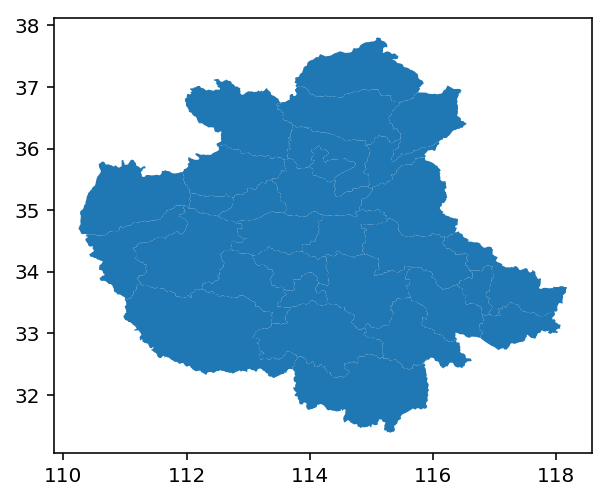

In [15]:
Central_China_city_group_map_data.plot()

## Save map data

In [16]:
Central_China_city_group_map_data.to_file('../data/Central_China_city_group4.geojson', driver='GeoJSON')

## Read carbon emission data

In [17]:
carbon_emssion_2014 = pd.read_csv('../data/carbon_emission_2014.csv')
carbon_emssion_2014.head()

,NAME_2,Carbon_emission
0,Anyang,106.16
1,Hebi,27.57
2,Zhoukou,7.16
3,Zhumadian,24.80
4,Handan,190.54


## Incorporate carbon emission data into map data

In [18]:
joined_map_data = Central_China_city_group_map_data.join(carbon_emssion_2014.set_index('NAME_2'), on='NAME_2')
joined_map_data.head()

,id,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry,Carbon_emission
113,None,49,CHN,China,12,河南,114,Anyang,,0,,Dìjíshì,Prefecture City,安阳市,Ānyáng,"POLYGON ((114.9180124138531 36.04622249815612,...",106.16
114,None,49,CHN,China,12,河南,115,Hebi,,0,,Dìjíshì,Prefecture City,鹤壁市,Hèbì,"POLYGON ((114.4043179802214 35.48762948057278,...",27.57
115,None,49,CHN,China,12,河南,116,Jiaozuo,,0,,Dìjíshì,Prefecture City,焦作市,Jiāozuò,"POLYGON ((113.5750802883296 34.95783682240919,...",25.75
116,None,49,CHN,China,12,河南,117,Jiyuan,,0,,Dìjíshì,Prefecture City,济源市,Jǐyuán,"POLYGON ((112.2521297939359 34.94109242739771,...",32.03
117,None,49,CHN,China,12,河南,118,Kaifeng,,0,,Dìjíshì,Prefecture City,开封市,Kāifēng,"POLYGON ((115.2518721673156 34.85100758223588,...",16.52


## Plot map

In [19]:
# Convenience functions for working with colour ramps and bars
def colorbar_index(ncolors, cmap, labels=None, **kwargs):
    """
    This is a convenience function to stop you making off-by-one errors
    Takes a standard colour ramp, and discretizes it,
    then draws a colour bar with correctly aligned labels
    """
    cmap = discrete_cmap(ncolors, cmap)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    if labels:
        colorbar.set_ticklabels(labels)
    return colorbar

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [20]:
gdf = joined_map_data

In [21]:
# Calculate Jenks natural breaks for density
breaks = nb(
    gdf[gdf['Carbon_emission'].notnull()].Carbon_emission.values,
    initial=300,
    k=6)
# the notnull method lets us match indices when joining
jb = pd.DataFrame({'Carbon_emission_bins': breaks.yb}, index=gdf[gdf['Carbon_emission'].notnull()].index)
gdf = gdf.join(jb)
gdf.Carbon_emission_bins.fillna(-1, inplace=True)

In [22]:
jenks_labels = ["$\leq $ %0.1f(%s)" % (b, c) for b, c in zip(
    breaks.bins, breaks.counts)]
jenks_labels.insert(0, 'No data (%s)' % len(gdf[gdf['Carbon_emission'].isnull()]))

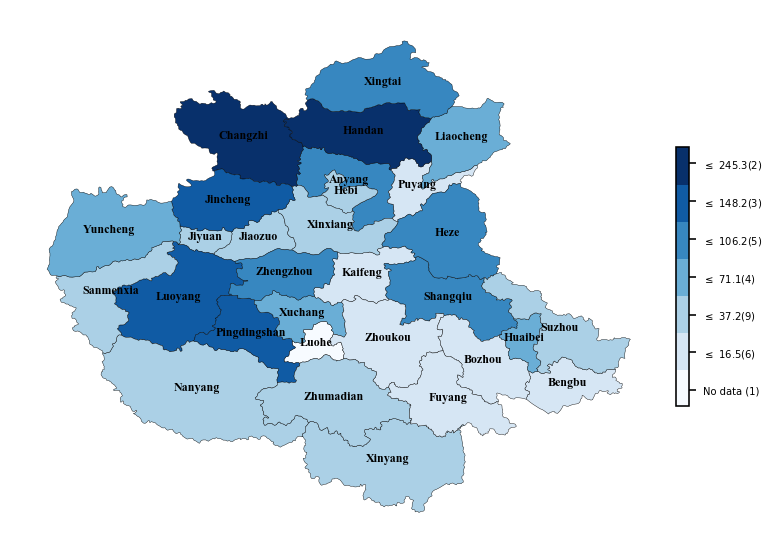

In [23]:
cmap = plt.get_cmap('Blues')

ax = gdf.plot(column='Carbon_emission_bins',cmap = cmap,legend=False,
             edgecolor = 'black', linewidth = 0.2)

cb = colorbar_index(ncolors=len(jenks_labels), cmap=cmap, 
                    pad = 0.02,shrink=0.5, labels = jenks_labels)
cb.ax.tick_params(labelsize=5)

plt.xticks([], [])
plt.yticks([],[])
plt.axis('off')
plt.tight_layout()

gdf.apply(lambda x: ax.annotate(s=x.NAME_2, xy=x.geometry.centroid.coords[0], ha='center',
                              fontsize=6,name = 'Times New Roman'),axis=1)

plt.savefig('../result/map.png',dpi=400,alpha=True)

plt.show()